In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
df = pd.read_csv('iris.csv')


In [4]:
df['Species'] = le.fit_transform(df['Species'])

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [6]:
data = df.values[:,:4]

In [7]:
data

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [26]:
n = 150
p= 2
clusters = []
c1 = random.choice(data)
clusters.append(c1)

In [27]:
maxim = 0                                      #finding c2 with a max dist from c1
c2 = []
for x in data:
    dist = np.linalg.norm(x - c1)
    if maxim <= dist:
        maxim = dist
        c2 = x
clusters.append(c2)
clusters

[array([125. ,   6.7,   3.3,   5.7]), array([1. , 5.1, 3.5, 1.4])]

In [28]:
t = 0
while t == 0:
    centdist = [] #array that stores distance between any two clusters
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            centdist.append(np.linalg.norm(clusters[i] - clusters[j])) # NC2 - store
            
    newc = np.zeros((1, 4)) #newcluster array 
    maxstep =0 #Maximum of the min distances (between the data value and cluster center)
    
    for x in data:
        present = 0 #to count that data isn't cluster center itself
        for i in range(len(clusters)):
            if np.linalg.norm(x - clusters[i]) != 0:  #checking if data element is not equal to cluster center
                present += 1 
                
        if present == len(clusters): #if element is cluster center then this loop won't run
            minstep = 10000000
            for i in clusters:
                if minstep > np.linalg.norm(x - i):
                    minstep = np.linalg.norm(x - i)
                    
            if maxstep < minstep:
                maxstep = minstep #maximum distance of all the minimum distances
                newc = x #new cluster initialized
                
    count =0   #count to see if we have found a new cluster             
    for i in range(len(centdist)):
        if round(maxstep/centdist[i], 1) >= 0.5: #appreciable fraction found through trial and error - find out what exactly the scene is here
            count += 1
            #print(round(maxstep/centdist[i], 1))
    if count == len(centdist): 
        clusters.append(newc)
    else:
        t= 1
clusters

[array([125. ,   6.7,   3.3,   5.7]),
 array([1. , 5.1, 3.5, 1.4]),
 array([63. ,  6. ,  2.2,  4. ])]

In [29]:
weight = np.random.dirichlet(np.ones(len(clusters)), size = len(data))             #assigning random weights
weight

array([[0.35943144, 0.02542443, 0.61514413],
       [0.00756927, 0.57776488, 0.41466584],
       [0.22066319, 0.63748935, 0.14184746],
       [0.35183468, 0.32366956, 0.32449576],
       [0.39183034, 0.24654678, 0.36162288],
       [0.06788333, 0.24191968, 0.69019699],
       [0.60193312, 0.25199967, 0.14606721],
       [0.49911637, 0.10110249, 0.39978114],
       [0.71254456, 0.0764786 , 0.21097684],
       [0.09220555, 0.24080685, 0.6669876 ],
       [0.07503962, 0.21436911, 0.71059128],
       [0.88774096, 0.08275018, 0.02950886],
       [0.20949667, 0.35052168, 0.43998165],
       [0.13372313, 0.74778783, 0.11848904],
       [0.08031613, 0.38996894, 0.52971493],
       [0.24866963, 0.03832999, 0.71300038],
       [0.35175926, 0.30650438, 0.34173635],
       [0.74891525, 0.23824612, 0.01283863],
       [0.86273704, 0.10010054, 0.03716242],
       [0.05713723, 0.87486772, 0.06799506],
       [0.49562243, 0.12765599, 0.37672159],
       [0.0438486 , 0.56913326, 0.38701814],
       [0.

In [30]:
val = 100
error = np.zeros((n,len(clusters)))
numclusters = len(clusters)

In [44]:
for z in range(100):

    wp = np.multiply(weight, weight)        #with p= 2, power of weight is raised to 2
    sumw = np.sum(wp, axis =0)     #calculating sum of squares of weights of same clusters
    
      
    centroid = np.transpose(np.divide((np.dot(np.transpose(data), wp)), sumw))       #calculating the centroid by transposing data matrix and multiplying
                                                                       #it with the wp matrix, transposing it again to get the accurate centroid amtrix
    distances = np.zeros((n,numclusters))       #initalising the matrix clusters
    
    for i in range(numclusters):                 #finding the eucledian disance between xj and cj
        distances[:,i] = np.linalg.norm(data - centroid[i], axis = 1)
    
    distsum = np.zeros((n,numclusters))

    wt = np.zeros((n,numclusters))
    for i in range(len(distances)):
        distsum[i] = 1/distances[i]

    invsum = np.sum(distsum, axis = 1)    
    for i in range(len(distances)):
        for j in range(0, 3):
            wt[i][j] = (float(1/distances[i][j]))/(float(invsum[i]))

    error = np.absolute(wt - weight)
    weight = np.array(wt)
#val = np.sum(np.sum(error, axis = 1), axis = 0)

In [45]:
    #print(val)
m = np.sum(error, axis = 1)
print(float(np.sum(m)))

0.0


In [46]:
category = np.zeros(n)
for i in range(len(weight)):
    maxim = max(weight[i])

    if weight[i][0] == maxim:
        category[i] = 0

    elif weight[i][1] == maxim:
        category[i] = 1

    elif weight[i][2] == maxim:
        category[i] = 2

In [34]:
print(category)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


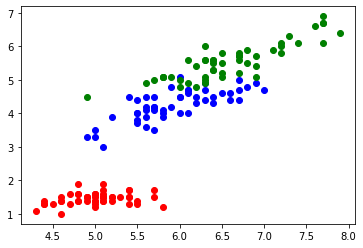

In [51]:
colors = ['red', 'blue', 'green']
#for i in range(n):
    #plt.scatter(data[i, 0], data[i,1], color = colors[int(category[i])], label = category[i])
species = [0, 1, 2]
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])

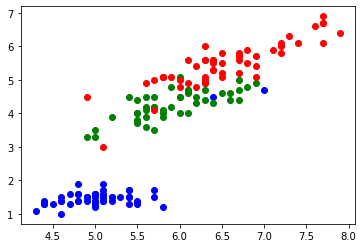

In [52]:

for i in range(n):
    plt.scatter(data[i, 1], data[i,3], color = colors[int(category[i])], label = category[i])

In [43]:
sp =0
sp2 = 0
sp3= 0
for i in range(n):
    if category[i] == 0:
        sp += 1
    elif category[i] == 1:
        sp2 += 1
    elif category[i] == 2:
        sp3 += 1
print(sp, sp2, sp3)    

52 52 46
